In [277]:
from pathlib import Path
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

In [3]:
hyspexdir = Path("/Volumes/FIREICE/fiboreal/cwaigl/2021-HySpex_fuels/HySpex_data_extracted/")
datafile = "spectra_fortraining.pkl.gz"

In [4]:
spectra = pd.read_pickle(hyspexdir / datafile)
spectra

,fid,species,event,flightline,vegclass,context,spectrum
0,0,black spruce,20210803-BC,03,Open Black Spruce Forest,crown,"[120.0, 100.0, 75.0, 109.0, 104.0, 106.0, 154...."
1,1,black spruce,20210803-BC,03,Open Black Spruce Forest,crown,"[31.0, 101.0, 89.0, 133.0, 109.0, 145.0, 151.0..."
2,2,black spruce,20210803-BC,03,Open Black Spruce Forest,crown,"[104.0, 78.0, 78.0, 111.0, 121.0, 94.0, 99.0, ..."
3,3,black spruce,20210803-BC,03,Open Black Spruce Forest,crown,"[70.0, 95.0, 108.0, 132.0, 125.0, 131.0, 172.0..."
4,4,understory,20210803-BC,03,Open Black Spruce Forest,semi-shade,"[55.0, 41.0, 64.0, 76.0, 102.0, 112.0, 139.0, ..."
...,...,...,...,...,...,...,...
855,788,water,20200830-BC,06,river,open,"[476.0, 385.0, 474.0, 456.0, 495.0, 419.0, 504..."
856,789,water,20200830-BC,06,river,open,"[525.0, 449.0, 502.0, 528.0, 451.0, 446.0, 534..."
857,790,water,20200830-BC,06,river,open,"[412.0, 387.0, 350.0, 430.0, 448.0, 448.0, 575..."
858,791,water,20200830-BC,06,river,open,"[403.0, 386.0, 380.0, 402.0, 456.0, 462.0, 508..."


In [11]:
spectra.groupby(['species','context']).count().reset_index()

,species,context,fid,event,flightline,vegclass,spectrum
0,alder,crown,9,9,9,9,9
1,alder/willow,crown,1,1,1,1,1
2,asphalt,open,33,33,33,33,33
3,black spruce,crown,50,50,50,50,50
4,dead wood,open,4,4,4,4,4
5,graminoid,crown,4,4,4,4,4
6,graminoid,open,67,67,67,67,67
7,graminoid,semi-shade,2,2,2,2,2
8,graminoid,shade,10,10,10,10,10
9,gravel,open,19,19,19,19,19


In [280]:
data = spectra.loc[
#    (spectra.event=='20210803-BC') & 
    (spectra.species.isin(['black spruce', 'white spruce', 'paper birch', 'quaking aspen'])) #&
#    (spectra.context=='crown')
] 
data

,fid,species,event,flightline,vegclass,context,spectrum
0,0,black spruce,20210803-BC,03,Open Black Spruce Forest,crown,"[120.0, 100.0, 75.0, 109.0, 104.0, 106.0, 154...."
1,1,black spruce,20210803-BC,03,Open Black Spruce Forest,crown,"[31.0, 101.0, 89.0, 133.0, 109.0, 145.0, 151.0..."
2,2,black spruce,20210803-BC,03,Open Black Spruce Forest,crown,"[104.0, 78.0, 78.0, 111.0, 121.0, 94.0, 99.0, ..."
3,3,black spruce,20210803-BC,03,Open Black Spruce Forest,crown,"[70.0, 95.0, 108.0, 132.0, 125.0, 131.0, 172.0..."
6,6,black spruce,20210803-BC,03,Open Black Spruce Forest,crown,"[154.0, 92.0, 127.0, 146.0, 130.0, 130.0, 187...."
...,...,...,...,...,...,...,...
833,794,black spruce,20210803-BC,01,Open Spruce/Tamarack Forest,crown,"[210.0, 238.0, 219.0, 269.0, 244.0, 266.0, 318..."
834,795,black spruce,20210803-BC,01,Open Spruce/Tamarack Forest,crown,"[217.0, 183.0, 169.0, 235.0, 245.0, 247.0, 270..."
835,796,black spruce,20210803-BC,01,Open Spruce/Tamarack Forest,crown,"[172.0, 228.0, 141.0, 190.0, 218.0, 216.0, 246..."
836,797,black spruce,20210803-BC,01,Open Spruce/Tamarack Forest,crown,"[282.0, 268.0, 241.0, 247.0, 234.0, 260.0, 262..."


In [281]:
data.species.value_counts()

white spruce     152
quaking aspen     98
paper birch       87
black spruce      51
Name: species, dtype: int64

In [282]:
selected_band_idx = np.array([284,
 1,
 235,
 346,
 152,
 311,
 49,
 238,
 364,
 119,
 87,
 250,
 409,
 117,
 361,
 189,
 54,
 303,
 218,
 85,
 252,
 149,
 362,
 173,
 428,
 14,
 217,
 260,
 104,
 368,
 96,
 421,
 9,
 218,
 330,
 107,
 431,
 41,
 253,
 187,
 349,
 92,
 312,
 33,
 218,
 407,
 157,
 370,
 27,
 217])

In [283]:
selected_cols = [f'band_{str(ii).zfill(3)}' for ii in selected_band_idx + 1]
selected_cols

['band_285',
 'band_002',
 'band_236',
 'band_347',
 'band_153',
 'band_312',
 'band_050',
 'band_239',
 'band_365',
 'band_120',
 'band_088',
 'band_251',
 'band_410',
 'band_118',
 'band_362',
 'band_190',
 'band_055',
 'band_304',
 'band_219',
 'band_086',
 'band_253',
 'band_150',
 'band_363',
 'band_174',
 'band_429',
 'band_015',
 'band_218',
 'band_261',
 'band_105',
 'band_369',
 'band_097',
 'band_422',
 'band_010',
 'band_219',
 'band_331',
 'band_108',
 'band_432',
 'band_042',
 'band_254',
 'band_188',
 'band_350',
 'band_093',
 'band_313',
 'band_034',
 'band_219',
 'band_408',
 'band_158',
 'band_371',
 'band_028',
 'band_218']

In [284]:
mlsamples = []

for idx, row in data.iterrows():
    newdic = {}
    newdic['label'] = row.species
    for bandlabel, ref in zip(selected_cols, row.spectrum[selected_band_idx + 1]):
        newdic[bandlabel] = ref
    mlsamples.append(newdic)

sampleDF = pd.DataFrame.from_records(mlsamples)
sampleDF

,label,band_285,band_002,band_236,band_347,band_153,band_312,band_050,band_239,band_365,...,band_254,band_188,band_350,band_093,band_313,band_034,band_408,band_158,band_371,band_028
0,black spruce,1011.0,75.0,2331.0,120.0,3210.0,1115.0,575.0,2191.0,412.0,...,875.0,2472.0,121.0,1171.0,1049.0,384.0,464.0,3109.0,387.0,232.0
1,black spruce,886.0,89.0,2141.0,103.0,2573.0,1035.0,493.0,2013.0,474.0,...,797.0,2342.0,105.0,959.0,930.0,353.0,469.0,2541.0,381.0,244.0
2,black spruce,869.0,78.0,2088.0,98.0,2368.0,985.0,482.0,1945.0,402.0,...,781.0,2265.0,101.0,933.0,923.0,331.0,555.0,2352.0,357.0,210.0
3,black spruce,627.0,108.0,1681.0,63.0,2195.0,735.0,490.0,1550.0,86.0,...,562.0,1910.0,66.0,891.0,705.0,374.0,294.0,2154.0,238.0,259.0
4,black spruce,1055.0,127.0,2482.0,100.0,2920.0,1190.0,584.0,2337.0,389.0,...,908.0,2839.0,104.0,1135.0,1116.0,443.0,494.0,2914.0,422.0,287.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,black spruce,1327.0,219.0,3129.0,159.0,4066.0,1474.0,822.0,2920.0,684.0,...,1186.0,3371.0,160.0,1580.0,1432.0,605.0,743.0,3960.0,509.0,416.0
384,black spruce,1393.0,169.0,2828.0,209.0,3418.0,1523.0,711.0,2672.0,664.0,...,1231.0,2764.0,206.0,1308.0,1486.0,510.0,843.0,3319.0,604.0,347.0
385,black spruce,1255.0,141.0,2792.0,174.0,3243.0,1392.0,644.0,2662.0,425.0,...,1153.0,2864.0,172.0,1232.0,1368.0,473.0,789.0,3186.0,496.0,333.0
386,black spruce,1369.0,241.0,3102.0,168.0,3669.0,1507.0,810.0,2924.0,536.0,...,1170.0,3413.0,176.0,1407.0,1457.0,569.0,701.0,3632.0,576.0,376.0


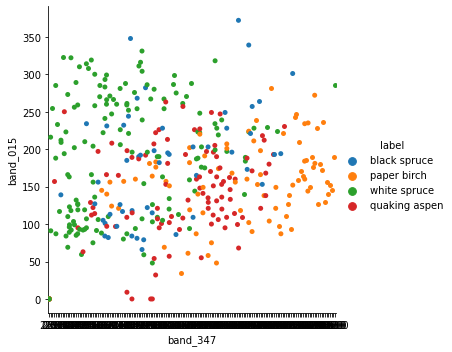

In [285]:
sb.catplot(x='band_347', y='band_015', hue='label', data=sampleDF)

In [267]:
import sklearn
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import sklearn.metrics
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE, ADASYN

In [268]:
X = sampleDF.drop(labels=['label'], axis=1)
y = sampleDF.label




In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_resampled, y_resampled = SMOTE(k_neighbors=3).fit_resample(X_train, y_train)
model = RandomForestClassifier(n_estimators=300, max_depth=15)
#model.fit(X_train, y_train)
model.fit(X_resampled, y_resampled)
y_predict = model.predict(X_test)

<AxesSubplot:>

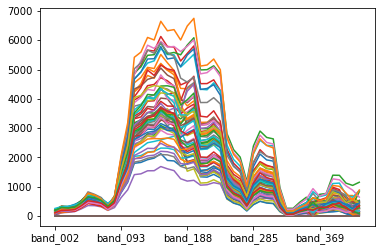

In [270]:
X_test.T.sort_index().plot(legend=False)

In [271]:
print(y_test, y_predict)

105     white spruce
108     white spruce
141     white spruce
55       paper birch
94      white spruce
           ...      
41      white spruce
4       black spruce
135      paper birch
32      white spruce
127    quaking aspen
Name: label, Length: 64, dtype: object ['white spruce' 'paper birch' 'white spruce' 'paper birch' 'white spruce'
 'white spruce' 'white spruce' 'white spruce' 'white spruce'
 'black spruce' 'black spruce' 'paper birch' 'white spruce' 'white spruce'
 'black spruce' 'white spruce' 'white spruce' 'white spruce'
 'white spruce' 'black spruce' 'white spruce' 'black spruce' 'paper birch'
 'paper birch' 'white spruce' 'quaking aspen' 'white spruce' 'paper birch'
 'white spruce' 'paper birch' 'white spruce' 'white spruce' 'white spruce'
 'paper birch' 'black spruce' 'white spruce' 'quaking aspen'
 'white spruce' 'white spruce' 'paper birch' 'white spruce'
 'quaking aspen' 'paper birch' 'white spruce' 'white spruce'
 'white spruce' 'paper birch' 'black spruce' 'white 

In [272]:
print(sklearn.metrics.f1_score(y_test,y_predict, average='micro'))
print(sklearn.metrics.classification_report(y_test,y_predict))

0.8125
               precision    recall  f1-score   support

 black spruce       0.78      0.78      0.78         9
  paper birch       0.87      0.81      0.84        16
quaking aspen       0.67      0.57      0.62         7
 white spruce       0.82      0.88      0.85        32

     accuracy                           0.81        64
    macro avg       0.78      0.76      0.77        64
 weighted avg       0.81      0.81      0.81        64



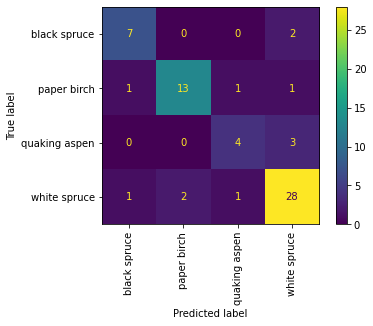

In [273]:
cm = confusion_matrix(y_test, y_predict, )
disp = ConfusionMatrixDisplay.from_predictions(y_test,y_predict, display_labels=sorted(y_test.unique()), xticks_rotation='vertical')


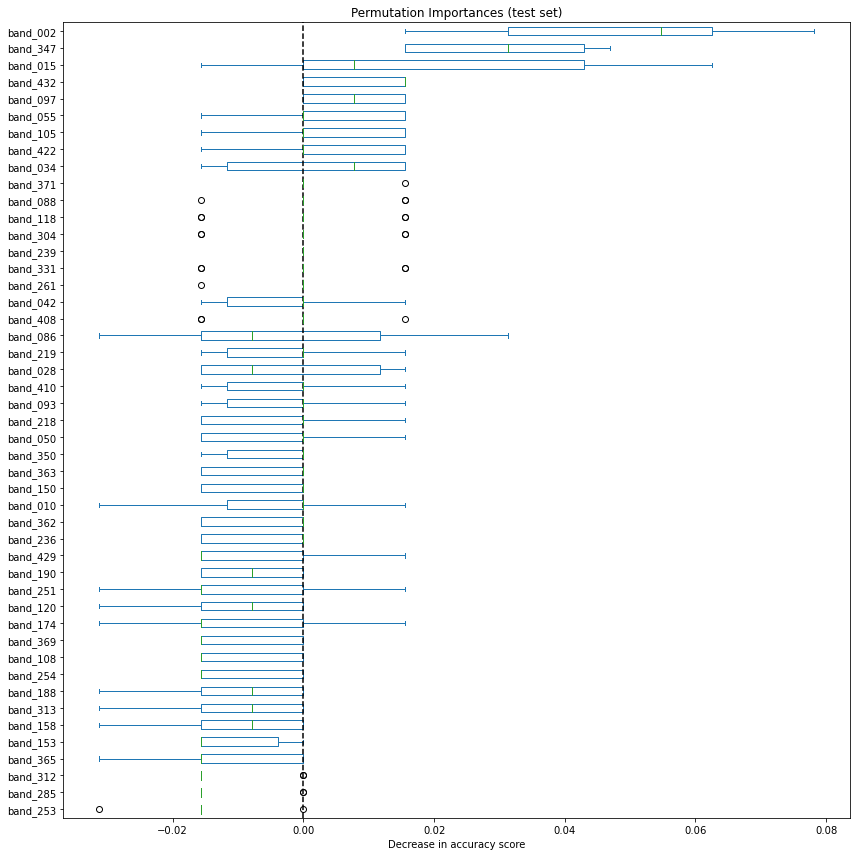

In [274]:
result = permutation_importance(
    model, X_test, y_test, n_repeats=10, random_state=41, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)

fig, ax = plt.subplots(figsize=(12, 12))
importances.plot.box(vert=False, whis=10, ax=ax)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()


<AxesSubplot:>

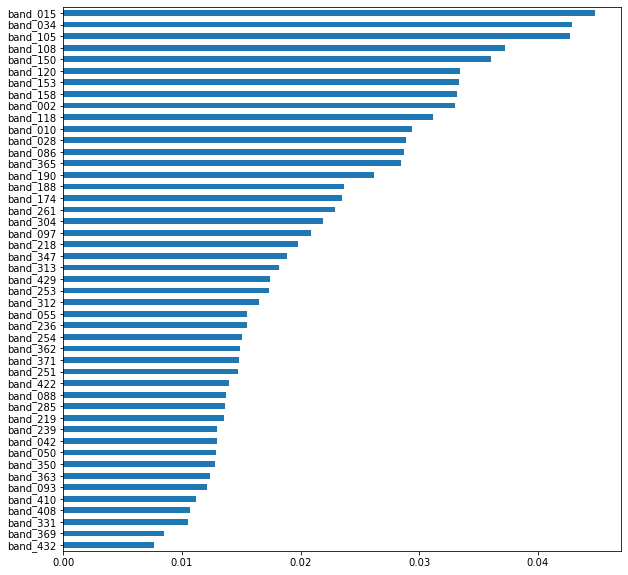

In [275]:

mdi_importances = pd.Series(
    model.feature_importances_, index=model.feature_names_in_
).sort_values(ascending=True)
fig, ax = plt.subplots(figsize=(10, 10))
mdi_importances.plot.barh(ax=ax)

In [276]:
model.feature_names_in_

array(['band_285', 'band_002', 'band_236', 'band_347', 'band_153',
       'band_312', 'band_050', 'band_239', 'band_365', 'band_120',
       'band_088', 'band_251', 'band_410', 'band_118', 'band_362',
       'band_190', 'band_055', 'band_304', 'band_219', 'band_086',
       'band_253', 'band_150', 'band_363', 'band_174', 'band_429',
       'band_015', 'band_218', 'band_261', 'band_105', 'band_369',
       'band_097', 'band_422', 'band_010', 'band_331', 'band_108',
       'band_432', 'band_042', 'band_254', 'band_188', 'band_350',
       'band_093', 'band_313', 'band_034', 'band_408', 'band_158',
       'band_371', 'band_028'], dtype=object)

In [182]:
X_std = pd.DataFrame(StandardScaler().fit_transform(X.values), columns=X.columns, index=X.index)   
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=42)
X_resampled, y_resampled = SMOTE(k_neighbors=3).fit_resample(X_train, y_train)
model = RandomForestClassifier(n_estimators=300, max_depth=15)
#model.fit(X_train, y_train)
model.fit(X_resampled, y_resampled)
y_predict = model.predict(X_test)

<AxesSubplot:>

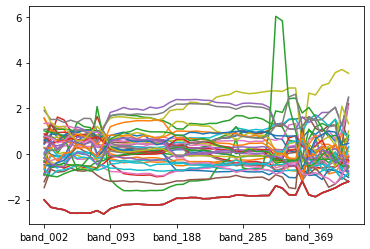

In [183]:
X_test.T.sort_index().plot(legend=False)


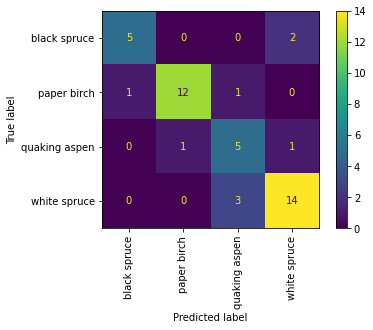

In [184]:
cm = confusion_matrix(y_test, y_predict, )
disp = ConfusionMatrixDisplay.from_predictions(y_test,y_predict, display_labels=sorted(y_test.unique()), xticks_rotation='vertical')


In [185]:
print(sklearn.metrics.precision_score(y_test,y_predict, average='micro'))
print(sklearn.metrics.recall_score(y_test,y_predict, average='micro'))
print(sklearn.metrics.f1_score(y_test,y_predict, average='micro'))
print(sklearn.metrics.classification_report(y_test,y_predict))



0.8
0.8
0.8000000000000002
               precision    recall  f1-score   support

 black spruce       0.83      0.71      0.77         7
  paper birch       0.92      0.86      0.89        14
quaking aspen       0.56      0.71      0.63         7
 white spruce       0.82      0.82      0.82        17

     accuracy                           0.80        45
    macro avg       0.78      0.78      0.78        45
 weighted avg       0.81      0.80      0.80        45



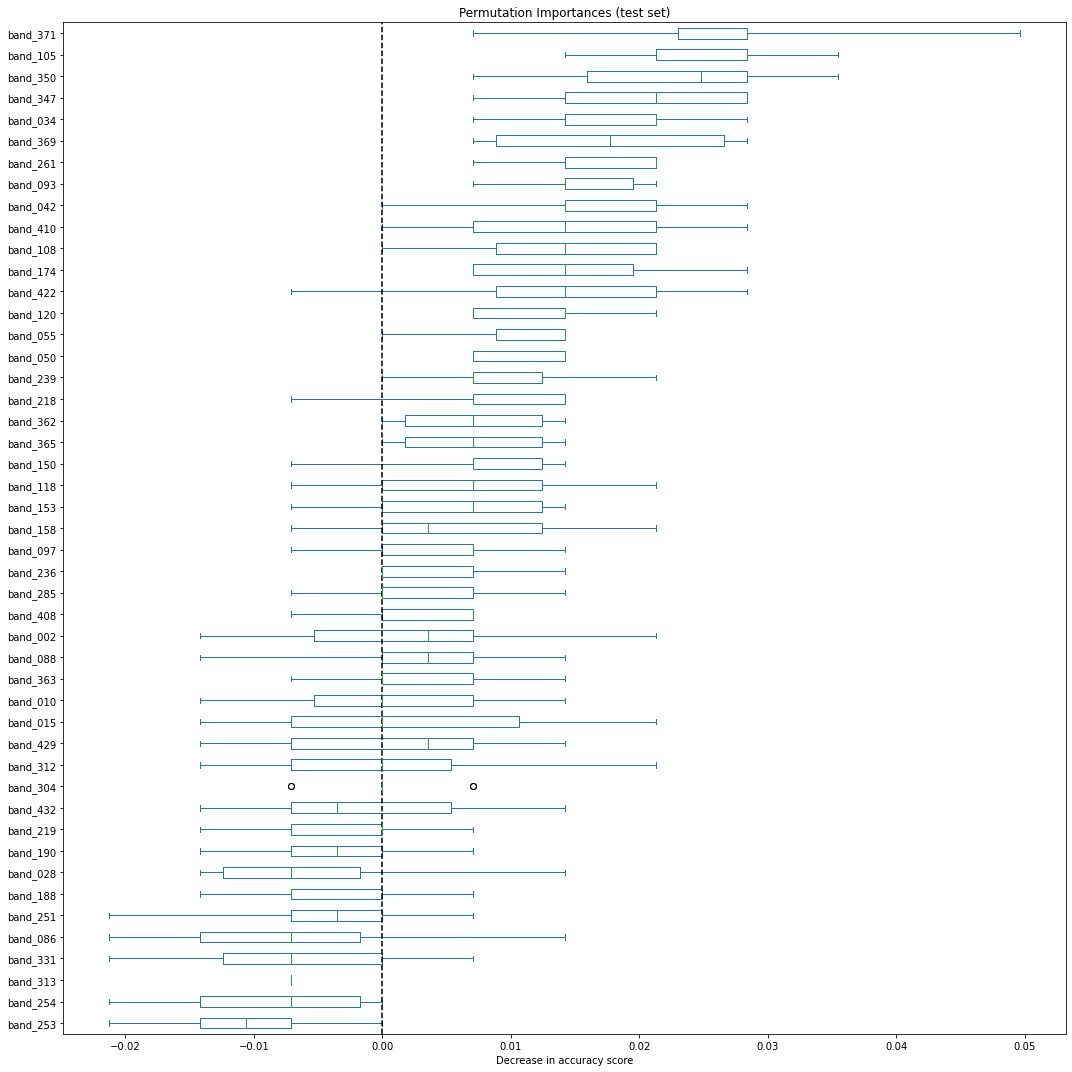

In [144]:
result = permutation_importance(
    model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)

fig, ax = plt.subplots(figsize=(15, 15))
importances.plot.box(vert=False, whis=10, ax=ax)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()